In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Sih career guidance.csv")

In [3]:
print(df.head())

               Profession     R     I     A     S     E     C  \
0          AI/ML Engineer   5.4  13.4  25.0  20.5  24.1  11.6   
1              Accountant   4.9  16.7  17.6  17.6  23.5  19.6   
2  Administrative Officer  13.5  18.3   4.8  25.0  27.9  10.6   
3   Advertising Executive   5.3  23.2   9.5  24.2  20.0  17.9   
4      Aerospace Engineer  21.9  16.7  18.4   8.8   7.9  26.3   

   Numerical_Aptitude  Spatial_Aptitude  Verbal_Aptitude  Analytical_Aptitude  \
0                  10                 4                9                    1   
1                   1                 8                3                    8   
2                   3                 6                7                    5   
3                   5                10                5                    5   
4                   2                 6                6                    7   

                                         Description  
0  A career as a AI/ML Engineer requires a blend ...  
1  A career 

In [4]:
df.shape

(173, 12)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Profession           173 non-null    object 
 1   R                    173 non-null    float64
 2   I                    173 non-null    float64
 3   A                    173 non-null    float64
 4   S                    173 non-null    float64
 5   E                    173 non-null    float64
 6   C                    173 non-null    float64
 7   Numerical_Aptitude   173 non-null    int64  
 8   Spatial_Aptitude     173 non-null    int64  
 9   Verbal_Aptitude      173 non-null    int64  
 10  Analytical_Aptitude  173 non-null    int64  
 11  Description          173 non-null    object 
dtypes: float64(6), int64(4), object(2)
memory usage: 16.3+ KB
None


In [6]:
print(df.describe())

                R           I           A           S           E           C  \
count  173.000000  173.000000  173.000000  173.000000  173.000000  173.000000   
mean    15.431214   16.852601   17.667630   16.420231   16.682659   16.947399   
std      6.761240    6.785369    6.924409    6.539282    6.865454    6.239592   
min      4.900000    4.700000    4.600000    4.200000    4.200000    4.700000   
25%      9.800000   11.500000   12.500000   11.700000   11.100000   12.200000   
50%     15.000000   16.900000   17.900000   16.300000   16.700000   17.200000   
75%     19.700000   21.900000   22.600000   20.600000   21.200000   21.200000   
max     33.300000   35.700000   35.100000   39.000000   35.000000   32.900000   

       Numerical_Aptitude  Spatial_Aptitude  Verbal_Aptitude  \
count          173.000000        173.000000       173.000000   
mean             5.497110          5.803468         5.624277   
std              2.892702          2.912800         2.820789   
min           

In [7]:
print(df.isnull().sum())

Profession             0
R                      0
I                      0
A                      0
S                      0
E                      0
C                      0
Numerical_Aptitude     0
Spatial_Aptitude       0
Verbal_Aptitude        0
Analytical_Aptitude    0
Description            0
dtype: int64


In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum()

Profession             0
R                      0
I                      0
A                      0
S                      0
E                      0
C                      0
Numerical_Aptitude     0
Spatial_Aptitude       0
Verbal_Aptitude        0
Analytical_Aptitude    0
Description            0
dtype: int64

In [10]:
(df.isnull().sum() / len(df)) * 100

Profession             0.0
R                      0.0
I                      0.0
A                      0.0
S                      0.0
E                      0.0
C                      0.0
Numerical_Aptitude     0.0
Spatial_Aptitude       0.0
Verbal_Aptitude        0.0
Analytical_Aptitude    0.0
Description            0.0
dtype: float64

In [11]:
df.fillna(df.median(numeric_only=True), inplace=True)   # for numbers
df.fillna(df.mode().iloc[0], inplace=True)   

In [12]:
df.isnull().sum().sum()

0

In [13]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Profession, R, I, A, S, E, C, Numerical_Aptitude, Spatial_Aptitude, Verbal_Aptitude, Analytical_Aptitude, Description]
Index: []

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

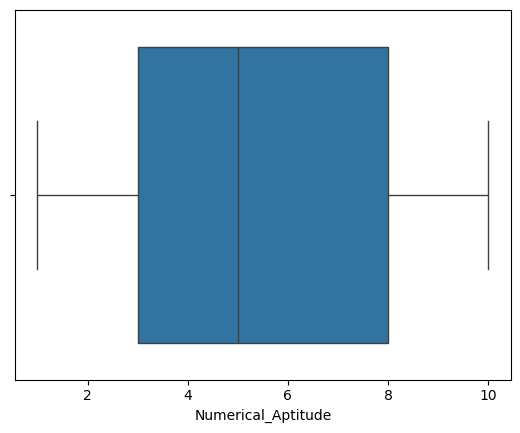

In [15]:
sns.boxplot(x=df['Numerical_Aptitude'])
plt.show()

In [16]:
print(df.columns)


Index(['Profession', 'R', 'I', 'A', 'S', 'E', 'C', 'Numerical_Aptitude',
       'Spatial_Aptitude', 'Verbal_Aptitude', 'Analytical_Aptitude',
       'Description'],
      dtype='object')


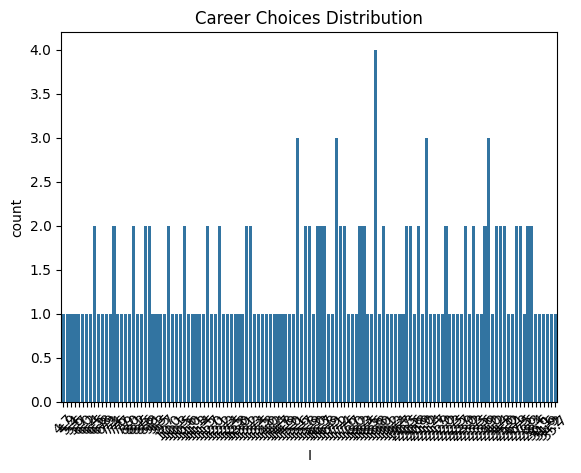

In [17]:
sns.countplot(x=df['I'])
plt.xticks(rotation=45)
plt.title("Career Choices Distribution")
plt.show()

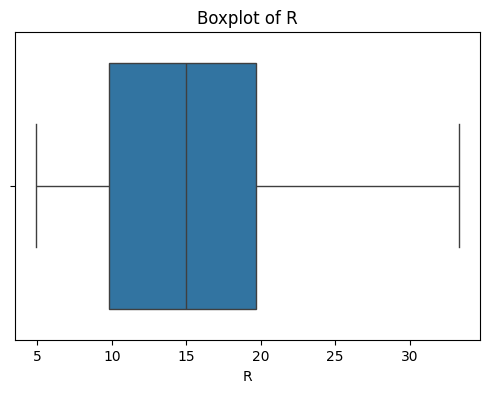

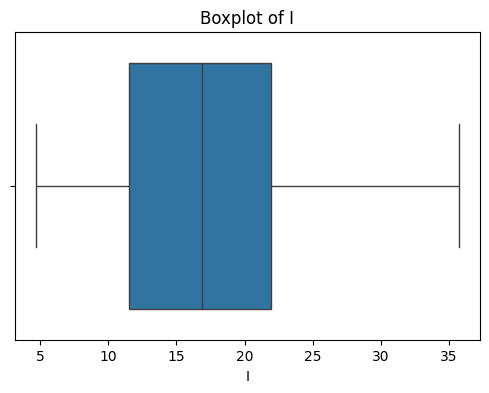

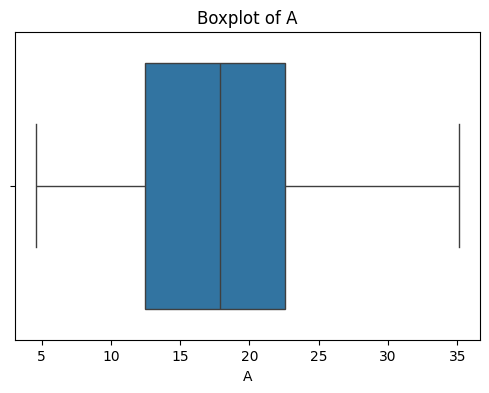

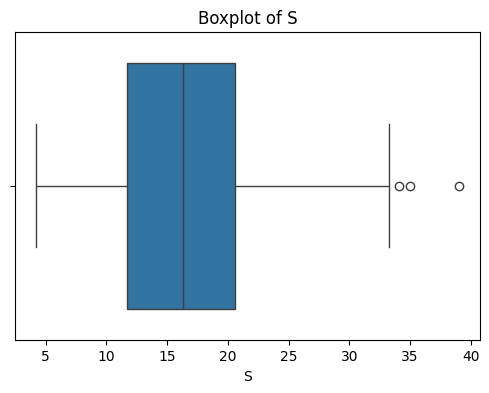

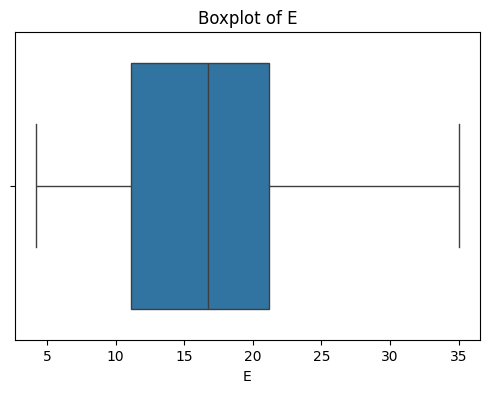

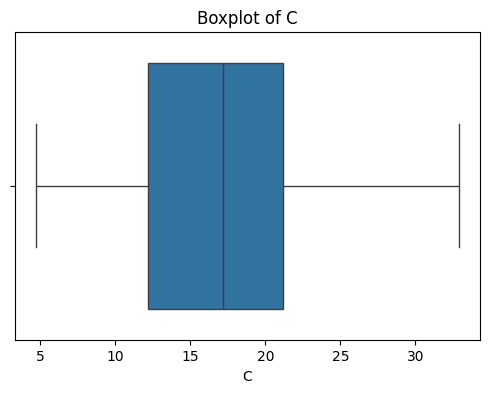

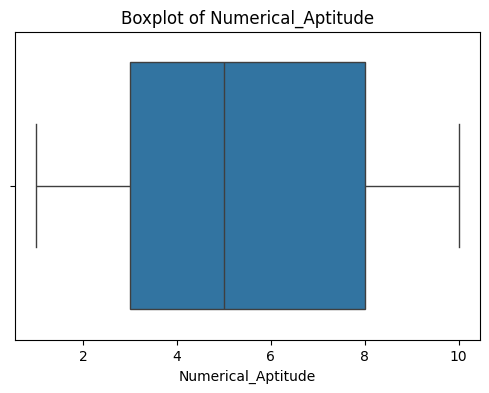

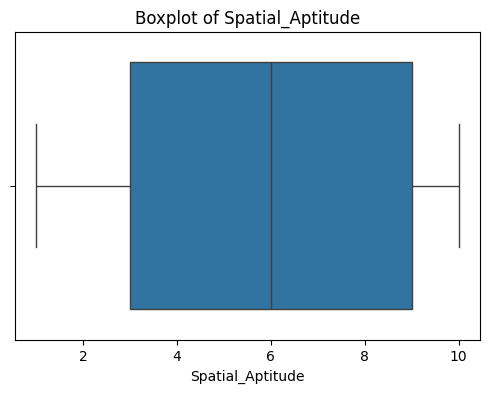

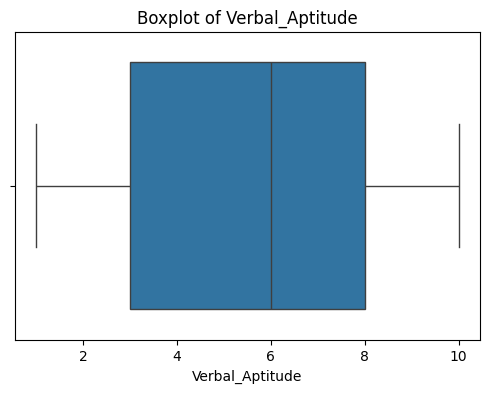

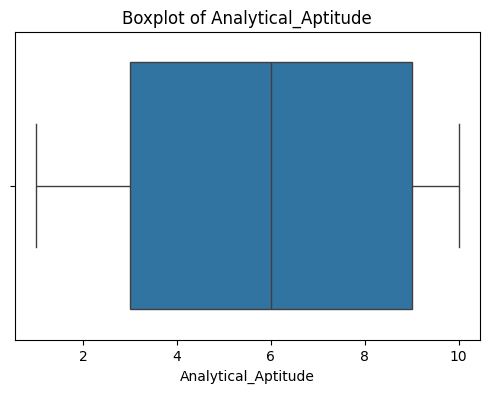

In [18]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

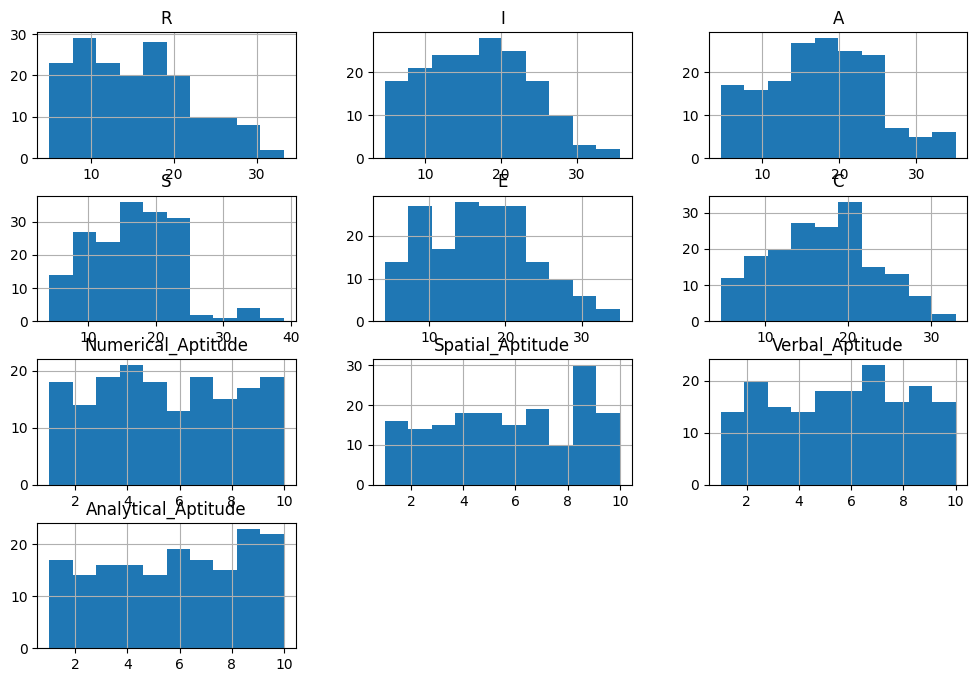

In [19]:
df.hist(figsize=(12,8))
plt.show()

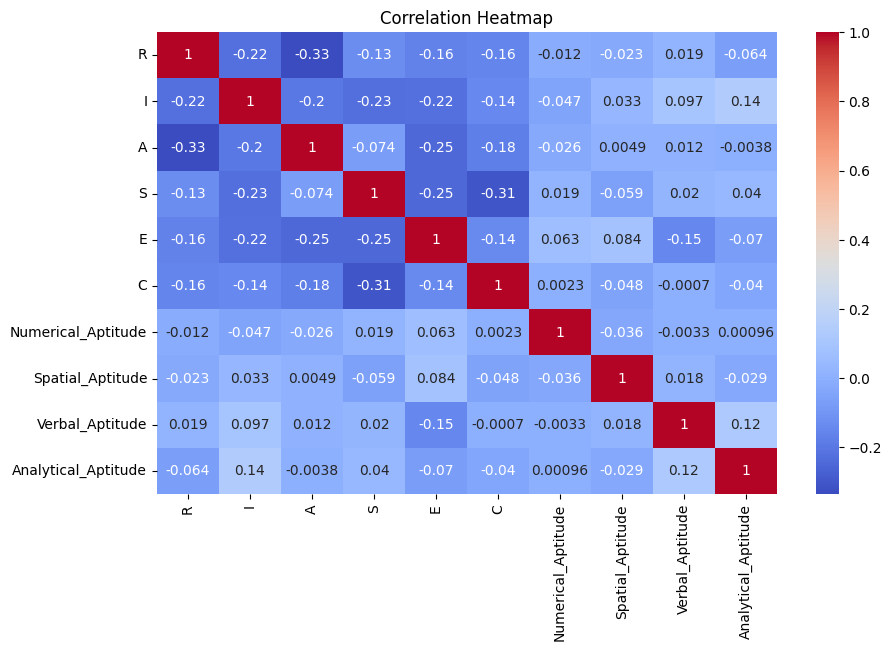

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [22]:
from sklearn.model_selection import train_test_split
x = df.drop('I',axis=1)
y = df['I']

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)    

In [23]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)

  

DecisionTreeRegressor(random_state=42)

In [24]:
y_pred = model.predict(x_test)


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate regression model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 59.94828571428572
Mean Absolute Error: 6.271428571428571
R² Score: -0.18241194702733177


C:\Users\soniy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
C:\Users\soniy\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
C:\Users\soniy\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\soniy\AppData\Roaming\Python\Python312\site-package

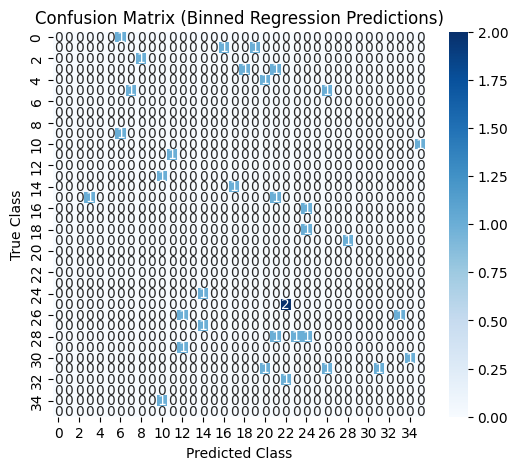

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
bins = np.linspace(min(y_test.min(), y_pred.min()), 
                   max(y_test.max(), y_pred.max()), )
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred, bins)                   

cm = confusion_matrix(y_test_binned, y_pred_binned)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Binned Regression Predictions)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [27]:
df1 = pd.read_csv("AI-based Career Recommendation System (1).csv")

In [28]:
print(df1.head(5))

   CandidateID           Name  Age   Education  \
0            1       John Doe   28  Bachelor's   
1            2     Jane Smith   32    Master's   
2            3    Bob Johnson   24  Bachelor's   
3            4    Emily Davis   26  Bachelor's   
4            5  Michael Brown   30    Master's   

                                      Skills                Interests  \
0      Python;Data Analysis;Machine Learning  Technology;Data Science   
1         Java;System Design;Cloud Computing  Software Development;AI   
2  Graphic Design;UI/UX;Adobe Creative Suite       Arts;Digital Media   
3            Python;Deep Learning;Statistics            Healthcare;AI   
4     Project Management;Communication;Agile      Business;Management   

  Recommended_Career  Recommendation_Score  
0     Data Scientist                  0.95  
1  Software Engineer                  0.90  
2        UX Designer                  0.88  
3      AI Researcher                  0.93  
4    Project Manager               

In [29]:
df1.shape

(200, 8)

In [30]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CandidateID           200 non-null    int64  
 1   Name                  200 non-null    object 
 2   Age                   200 non-null    int64  
 3   Education             200 non-null    object 
 4   Skills                200 non-null    object 
 5   Interests             200 non-null    object 
 6   Recommended_Career    200 non-null    object 
 7   Recommendation_Score  200 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 12.6+ KB
None


In [31]:
print(df1.describe())

       CandidateID         Age  Recommendation_Score
count   200.000000  200.000000            200.000000
mean    100.500000   30.125000              0.896450
std      57.879185    4.923472              0.028915
min       1.000000   22.000000              0.850000
25%      50.750000   26.750000              0.870000
50%     100.500000   29.000000              0.900000
75%     150.250000   33.000000              0.920000
max     200.000000   41.000000              0.950000


In [32]:
print(df1.isnull().sum())

CandidateID             0
Name                    0
Age                     0
Education               0
Skills                  0
Interests               0
Recommended_Career      0
Recommendation_Score    0
dtype: int64


In [33]:
df1.isnull().values.any()

False

In [34]:
df1.isnull().sum()

CandidateID             0
Name                    0
Age                     0
Education               0
Skills                  0
Interests               0
Recommended_Career      0
Recommendation_Score    0
dtype: int64

In [35]:
(df.isnull().sum() / len(df)) * 100

Profession             0.0
R                      0.0
I                      0.0
A                      0.0
S                      0.0
E                      0.0
C                      0.0
Numerical_Aptitude     0.0
Spatial_Aptitude       0.0
Verbal_Aptitude        0.0
Analytical_Aptitude    0.0
Description            0.0
dtype: float64

In [36]:
df1.fillna(df1.median(numeric_only=True), inplace=True)   # for numbers
df1.fillna(df1.mode().iloc[0], inplace=True)

In [37]:
df1.isnull().sum().sum()

0

In [50]:
df1[df1.isnull().any(axis=1)]

Empty DataFrame
Columns: [CandidateID, Name, Age, Education, Skills, Interests, Recommended_Career, Recommendation_Score]
Index: []

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

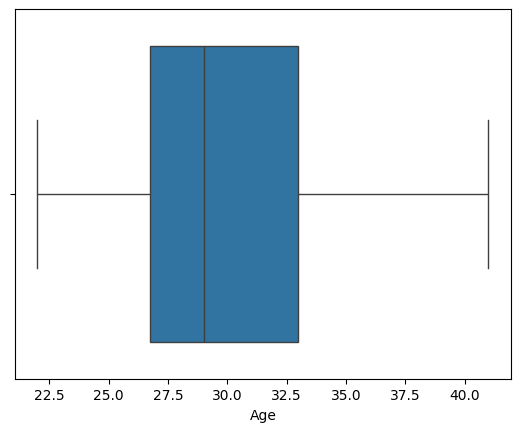

In [51]:
sns.boxplot(x=df1['Age'])
plt.show()

In [52]:
print(df1.columns)

Index(['CandidateID', 'Name', 'Age', 'Education', 'Skills', 'Interests',
       'Recommended_Career', 'Recommendation_Score'],
      dtype='object')


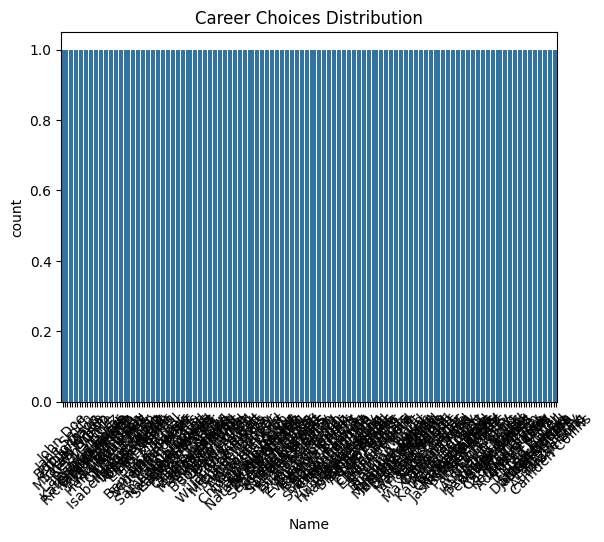

In [53]:
sns.countplot(x=df1['Name'])
plt.xticks(rotation=45)
plt.title("Career Choices Distribution")
plt.show()

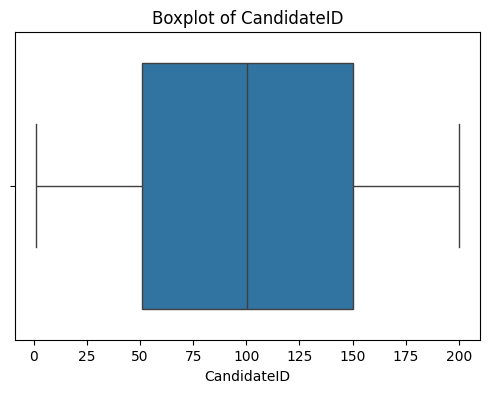

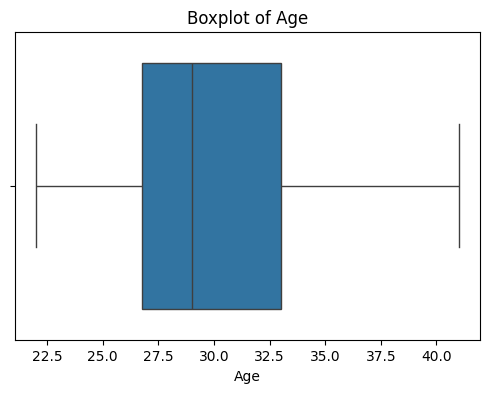

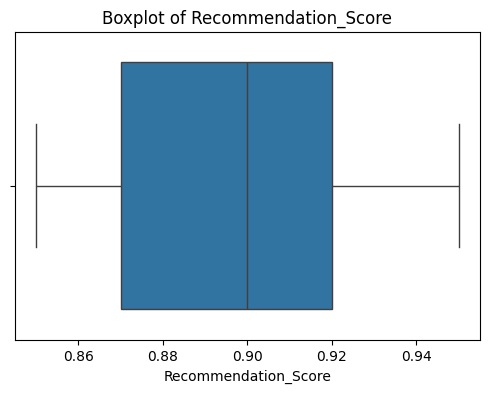

In [54]:
for col in df1.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

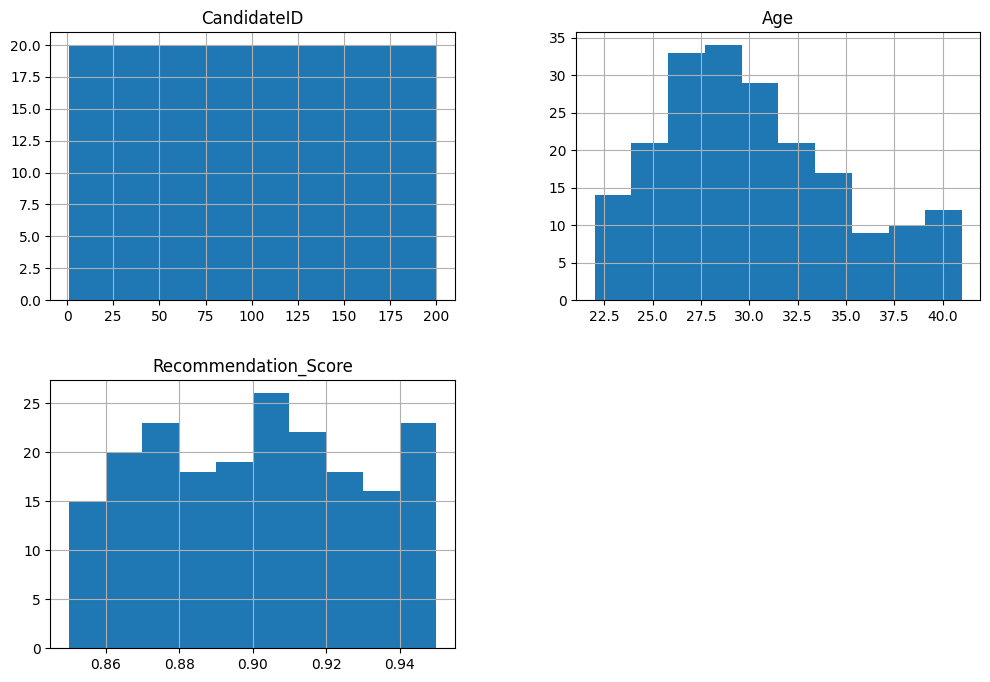

In [55]:
df1.hist(figsize=(12,8))
plt.show()

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = le.fit_transform(df1[col])

In [71]:
from sklearn.model_selection import train_test_split
x = df.drop('I',axis=1)
y = df['I']

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
) 

In [72]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

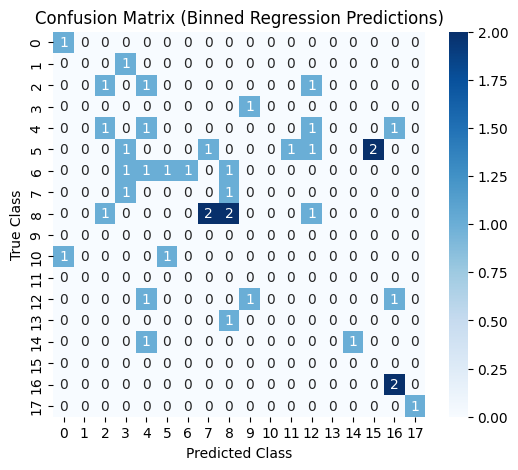

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
bins = np.linspace(min(y_test.min(), y_pred.min()), 
                   max(y_test.max(), y_pred.max()), )
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred, bins)                   

cm = confusion_matrix(y_test_binned, y_pred_binned)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Binned Regression Predictions)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [89]:
print(df1.columns)

Index(['CandidateID', 'Name', 'Age', 'Education', 'Skills', 'Interests',
       'Recommended_Career', 'Recommendation_Score'],
      dtype='object')


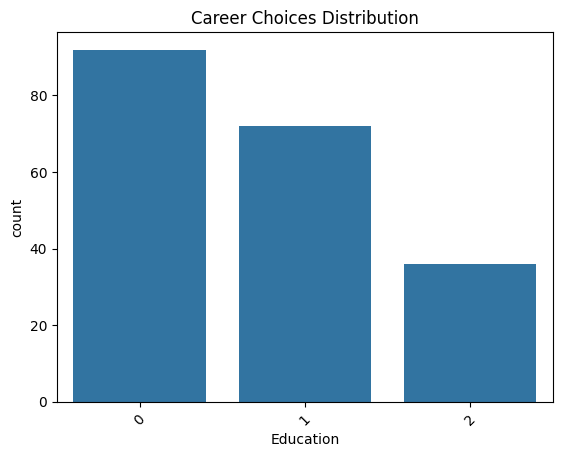

In [90]:
sns.countplot(x=df1['Education'])
plt.xticks(rotation=45)
plt.title("Career Choices Distribution")
plt.show()

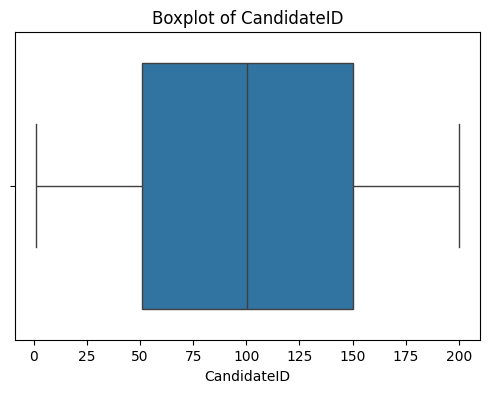

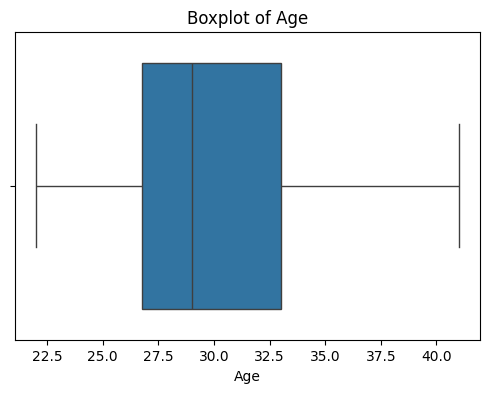

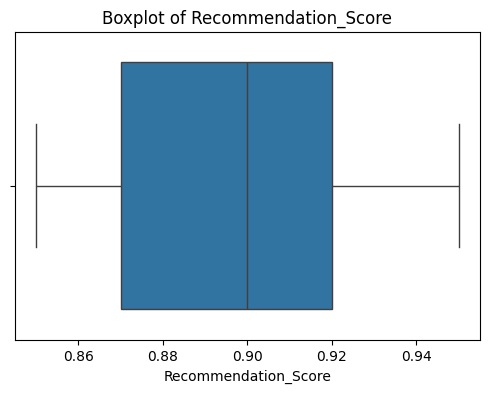

In [91]:
for col in df1.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

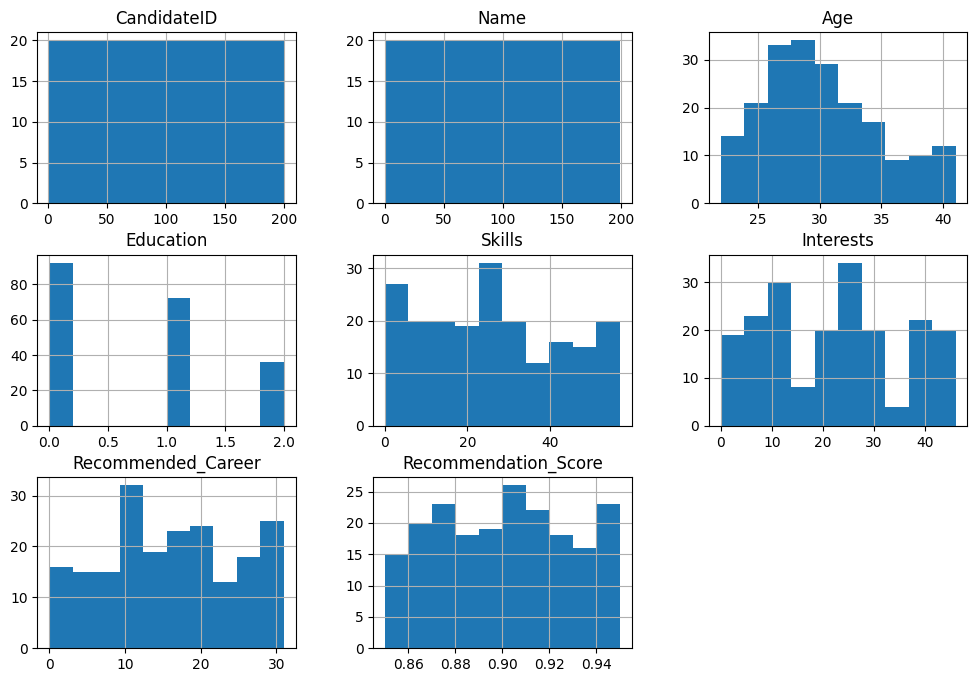

In [92]:
df1.hist(figsize=(12,8))
plt.show()

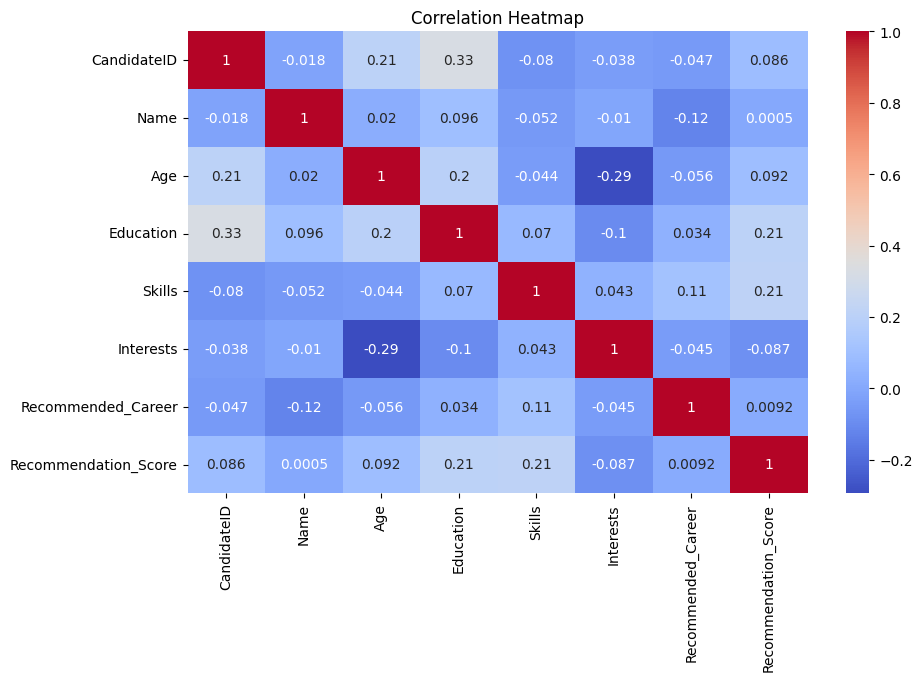

In [93]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [94]:
df1= pd.get_dummies(df1, drop_first=True)            ## Feature Engineering


In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = le.fit_transform(df1[col])

In [97]:
from sklearn.model_selection import train_test_split
x = df1.drop('Age',axis=1)
y = df1['Age']

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)  

In [98]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [99]:
y_pred = model.predict(x_test)

In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 29.625
Mean Absolute Error: 3.875
R^2 Score: -0.431159420289855


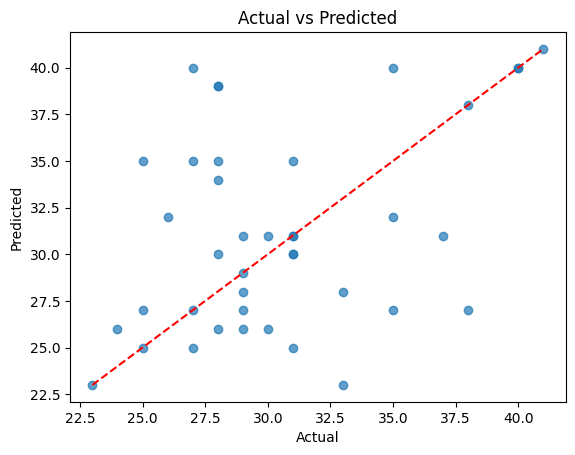

In [101]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [109]:
df2 = pd.read_csv("career_aptitude_dataset.csv")


In [110]:
print(df2.head())
print(df2.info())


           Profession  Numerical Aptitude  Spatial Aptitude  R  I  A  S  E  C  \
0          Accountant                  10                 6  3  4  3  5  5  1   
1    Graphic Designer                   8                 7  3  4  1  3  3  5   
2         Salesperson                  10                 3  3  2  4  5  3  3   
3  Research Scientist                   9                 8  5  5  2  5  4  3   
4             Teacher                   5                 9  4  1  4  3  2  5   

                                         Description  
0  Career in Accountant domain, requiring special...  
1  Career in Graphic Designer domain, requiring s...  
2  Career in Salesperson domain, requiring specia...  
3  Career in Research Scientist domain, requiring...  
4  Career in Teacher domain, requiring specialize...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              -----

In [111]:
df2 = pd.get_dummies(df2, drop_first=True)


In [113]:
x = df2.drop('R', axis=1)
y = df2['R']


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [116]:
## Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [117]:
#Train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

In [118]:
y_pred = model.predict(x_test)


In [119]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 2.81
Mean Absolute Error: 1.29
R^2 Score: -0.29


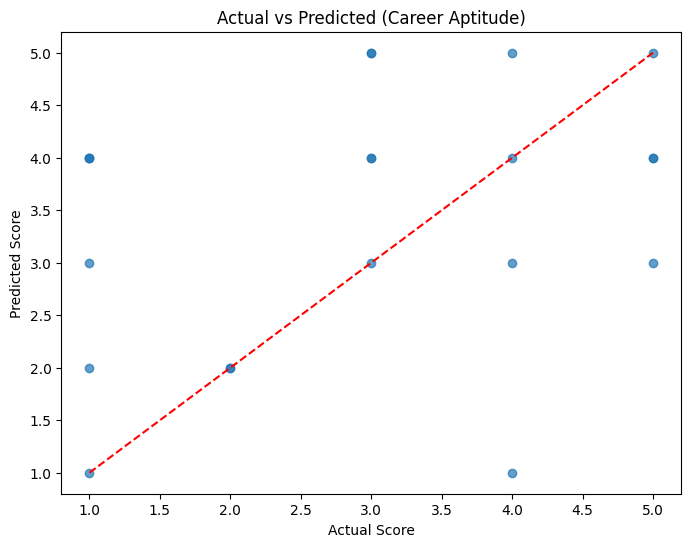

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted (Career Aptitude)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [123]:
df3 = pd.read_csv("Data_final.csv")

In [124]:
print(df3.head())

   O_score  C_score  E_score  A_score  N_score  Numerical Aptitude  \
0     5.45     8.67     3.45     5.34     4.23                9.23   
1     8.78     5.67     4.56     6.45     4.23                5.12   
2     6.12     6.78     9.34     7.56     5.01                6.23   
3     9.12     8.78     4.23     5.67     4.56                7.89   
4     6.45     7.56     5.67     9.12     4.23                5.34   

   Spatial Aptitude  Perceptual Aptitude  Abstract Reasoning  \
0              4.56                 6.78                7.89   
1              8.45                 7.89                6.34   
2              4.23                 6.45                6.67   
3              5.34                 6.45                9.34   
4              4.01                 6.23                5.78   

   Verbal Reasoning              Career  
0              6.12          Accountant  
1              6.01    Graphic Designer  
2              8.45         Salesperson  
3              7.67  Resea

In [125]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   O_score              105 non-null    float64
 1   C_score              105 non-null    float64
 2   E_score              105 non-null    float64
 3   A_score              105 non-null    float64
 4   N_score              105 non-null    float64
 5   Numerical Aptitude   105 non-null    float64
 6   Spatial Aptitude     105 non-null    float64
 7   Perceptual Aptitude  105 non-null    float64
 8   Abstract Reasoning   105 non-null    float64
 9   Verbal Reasoning     105 non-null    float64
 10  Career               105 non-null    object 
dtypes: float64(10), object(1)
memory usage: 9.2+ KB
None


In [126]:
## feature Engineering
df3 = pd.get_dummies(df, drop_first=True)


In [127]:
df3 = df3.dropna()  # Or use df.fillna() if you prefer imputation


In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [132]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [133]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train_scaled, y_train)


DecisionTreeRegressor(random_state=42)

In [134]:
y_pred = model.predict(x_test_scaled)


In [135]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 2.81
Mean Absolute Error: 1.29
R^2 Score: -0.29


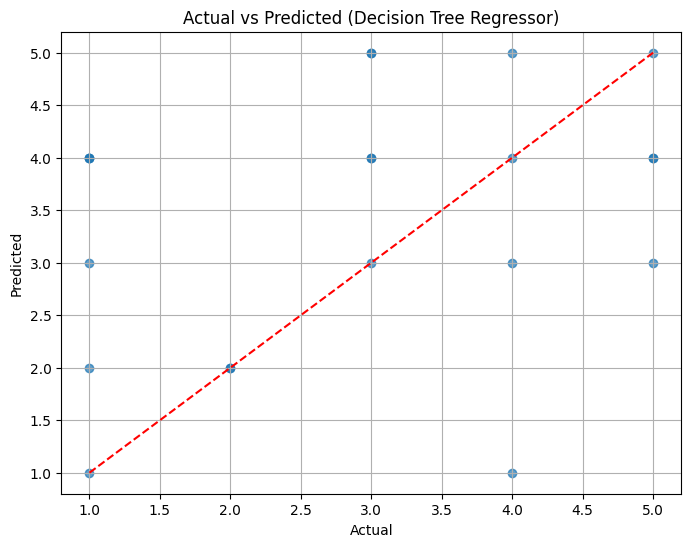

In [136]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Decision Tree Regressor)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


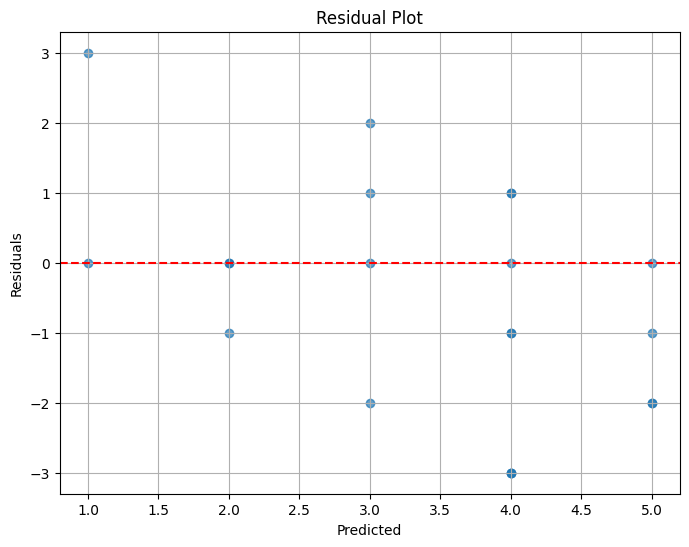

In [137]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [ ]:
import joblib

In [ ]:
joblib.dump(model, "career_model.pkl")


In [ ]:
pip install flask

In [ ]:
import flask

In [138]:
import pickle

# after training
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [139]:
import os

file_path = r"C:\Users\soniy\PycharmProjects\Maargdisha\model.pkl"
print("File exists:", os.path.exists(file_path))


File exists: True


In [140]:
import pickle

file_path = r"C:\Users\soniy\PycharmProjects\Maargdisha\model.pkl"

with open(file_path, "rb") as f:
    content = f.read(10)
    print(content)


b'\xef\xbf\xbd\x04\xef\xbf\xbd\xef\xbf\xbd'


In [141]:
import pickle
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load data
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Train model
model = SVC(kernel="linear", probability=True)
model.fit(X_train, y_train)

# Save as proper pickle (binary mode!)
with open(r"C:\Users\soniy\PycharmProjects\Maargdisha\model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ model.pkl saved correctly!")


✅ model.pkl saved correctly!
